#PCA Image Recon
Shehzeen Khan, J028
B.Tech Data Science, Sem 5

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
<br>
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

Parameters | Number
--- | ---
Classes | 10
Samples per class | ~7000 samples per class
Samples total | 70000
Dimensionality | 784
Features | integers values from 0 to 255

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [ ]:
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import fetch_openml

## Download and Load the Data

In [ ]:
mnist = fetch_openml('mnist_784', version=1, return_X_y=False, as_frame=False)

In [ ]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [ ]:
# These are the images
mnist.data.shape

(70000, 784)

In [ ]:
# These are the labels
mnist.target.shape

(70000,)

### Originally I didnt standardize the data (You should uncomment line)

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
mnist.data = scaler.fit_transform(mnist.data)

Make an instance of PCA

In [ ]:
pca = PCA(.95)

Reduce the dimensionality of your data

In [ ]:
lower_dimensional_data = pca.fit_transform(mnist.data)

In [ ]:
pca.n_components_

332

In [ ]:
approximation = pca.inverse_transform(lower_dimensional_data)

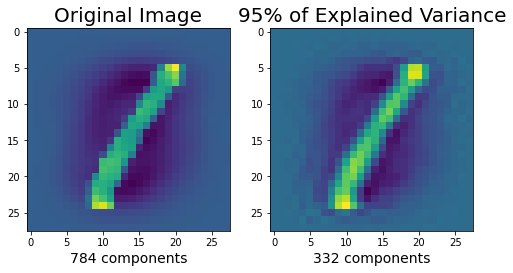

In [ ]:
plt.figure(figsize=(8,4));
image = 3
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[image].reshape(28,28));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

plt.subplot(1, 2, 2);
plt.imshow(approximation[image].reshape(28, 28));
plt.xlabel(f'{pca.n_components_} components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);
plt.show()

## Showing Graph of Explained Variance vs Number of Principal Components

In [ ]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()

In [ ]:
pca.fit(mnist.data)

PCA()

In [ ]:
pca.n_components_

784

In [ ]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

719.0102715753046

In [ ]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[5.6427189026199605, 4.041225876161711, 3.7382733314866106, 2.892999670315925, 2.5207517581331933]


In [ ]:
tot = sum(pca.explained_variance_)
tot

719.0102715753046

In [ ]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[5.6427189026199605, 4.041225876161711, 3.7382733314866106, 2.892999670315925, 2.5207517581331933]


In [ ]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 

Plot can help you understand the level of redundancy present in multiple dimensions.

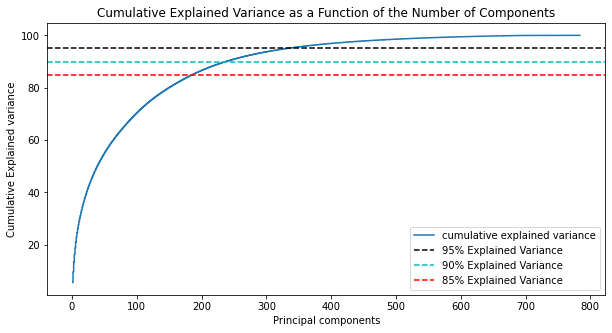

In [ ]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

## Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [ ]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [ ]:
componentsVariance

[784, 544, 332, 238, 186]

In [ ]:
from sklearn.decomposition import PCA


def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

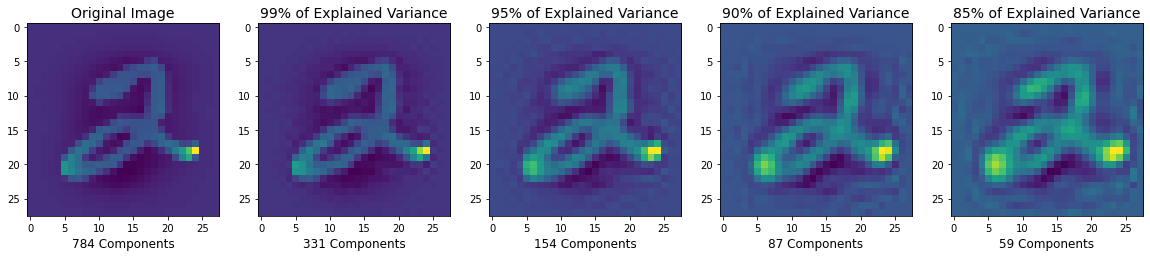

In [ ]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data[5].reshape(28,28));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[5].reshape(28, 28));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[5].reshape(28, 28));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28, 28));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

In [ ]:
mnist.target

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])